In [1]:
# fmt: off
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%load_ext jupyter_black
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
from mls_scf_tools.mls_pint import ureg
plt.style.use("mls_scf")
def vdir(obj):
    return [x for x in dir(obj) if not x.startswith('__')]
# fmt: on

In [2]:
from scipy import sparse
import warnings

In [3]:
%autoreload 2

In [4]:
import dualpy as dp
from dualpy.numeric_jacobians import compute_numeric_jacobians

Defining Unitless


In [5]:
dp.set_config(check_jacobians=True)

In [6]:
def myfunction(omega_array, amplitude_array, t):
    omega = omega_array[1, 2]
    amplitude = amplitude_array[3]
    x = amplitude * np.sin(omega * t) * ureg.dimensionless
    return x

In [7]:
omega_array = np.ones([4, 3]) * 4 * 2 * np.pi / 100.0 * (ureg.rad / ureg.s)
omega_array = dp.seed(omega_array, "omega_array")
amplitude_array = np.ones(4) * ureg.m
amplitude_array = dp.seed(amplitude_array, "amplitude_array")

In [8]:
N = 2**8
t = np.arange(N, dtype=float) * ureg.s
t = dp.seed(t, "t")

In [9]:
x = myfunction(omega_array=omega_array, amplitude_array=amplitude_array, t=t)

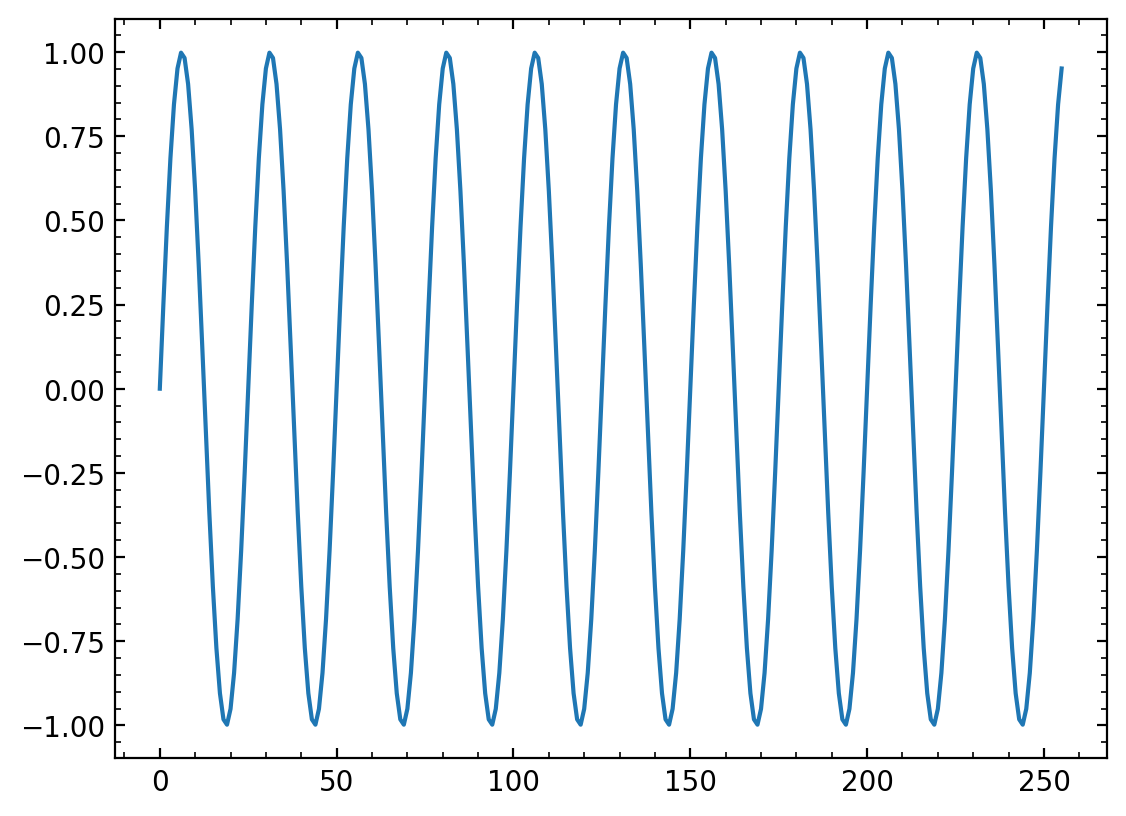

In [10]:
plt.plot(t, x);

In [11]:
NN = int(N / 2 + 1)
omega = np.arange(NN)
X = dp.rfft(x)

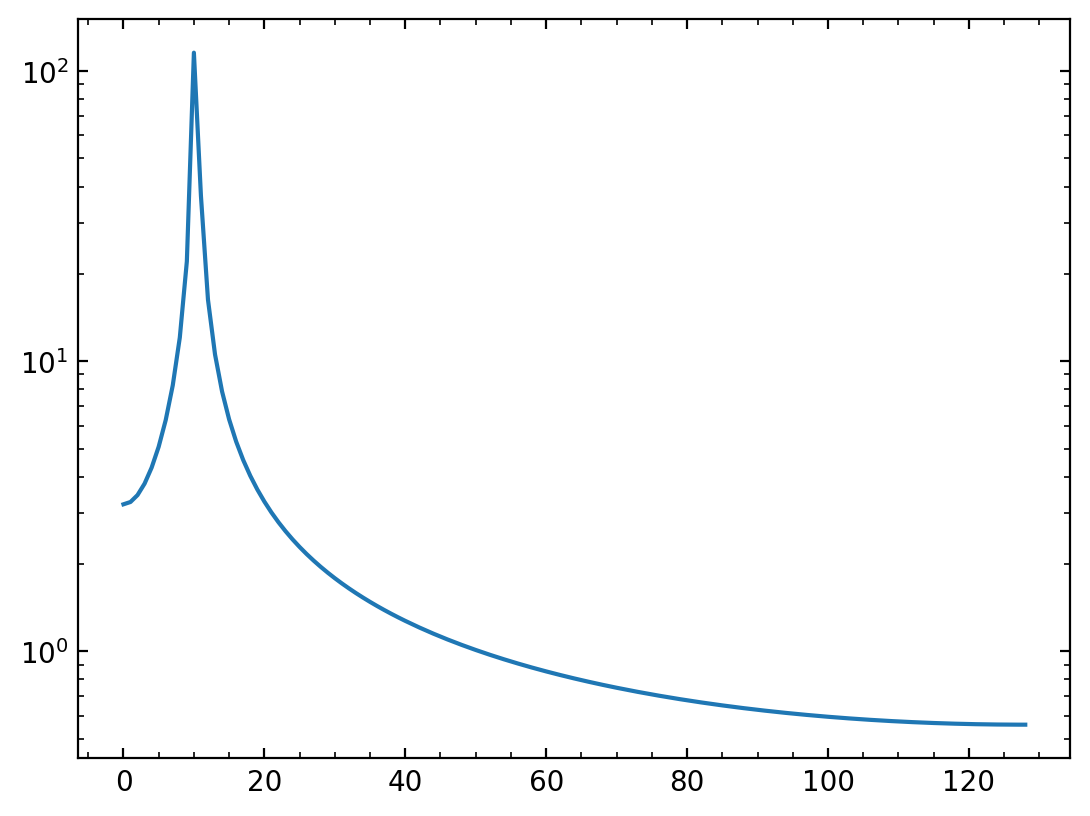

In [12]:
plt.semilogy(omega, np.abs(X));

In [13]:
j_ana, j_num = compute_numeric_jacobians(
    myfunction, args=[omega_array, amplitude_array, t]
)

  0%|          | 0/272 [00:00<?, ?it/s]/users/livesey/python/dualpy/dualpy/duals.py:416: RuntimeWarning: overflow encountered in divide
  r_ = 1.0 / b_
/users/livesey/python/dualpy/dualpy/duals.py:417: RuntimeWarning: invalid value encountered in multiply
  out_ = a_ * r_
100%|██████████| 272/272 [00:00<00:00, 473.71it/s]


In [14]:
term = "t"
r_ana = np.abs(j_ana.jacobians[term].todensearray())
r_num = np.abs(j_num.jacobians[term].todensearray())
theta_ana = np.angle(j_ana.jacobians[term].todensearray().magnitude)
theta_num = np.angle(j_num.jacobians[term].todensearray().magnitude)

Returning type(result)=<class 'numpy.ndarray'>
Returning type(result)=<class 'numpy.ndarray'>


In [15]:
j_ana.jacobians

{'amplitude_array': Jacobian of type <class 'dualpy.sparse_jacobians.SparseJacobian'>
 Dependent shape is (256,) <256>
 Independent shape is (4,) <4>
 Combined they are (256, 4) <1,024>
 Dummies are (1,) and (1,)
 Units are d<meter>/d<meter> = <dimensionless>
 data is <class 'scipy.sparse._csc.csc_matrix'>([256, 4], dtype=float64) with 256 numbers stored (25%),
 'omega_array': Jacobian of type <class 'dualpy.sparse_jacobians.SparseJacobian'>
 Dependent shape is (256,) <256>
 Independent shape is (4, 3) <12>
 Combined they are (256, 4, 3) <3,072>
 Dummies are (1,) and (1, 1)
 Units are d<meter>/d<radian / second> = <meter * second / radian>
 data is <class 'scipy.sparse._csc.csc_matrix'>([256, 12], dtype=float64) with 256 numbers stored (8.3%),
 't': Jacobian of type <class 'dualpy.diagonal_jacobians.DiagonalJacobian'>
 Dependent shape is (256,) <256>
 Independent shape is (256,) <256>
 Combined they are (256, 256) <65,536>
 Dummies are (1,) and (1,)
 Units are d<meter>/d<second> = <met

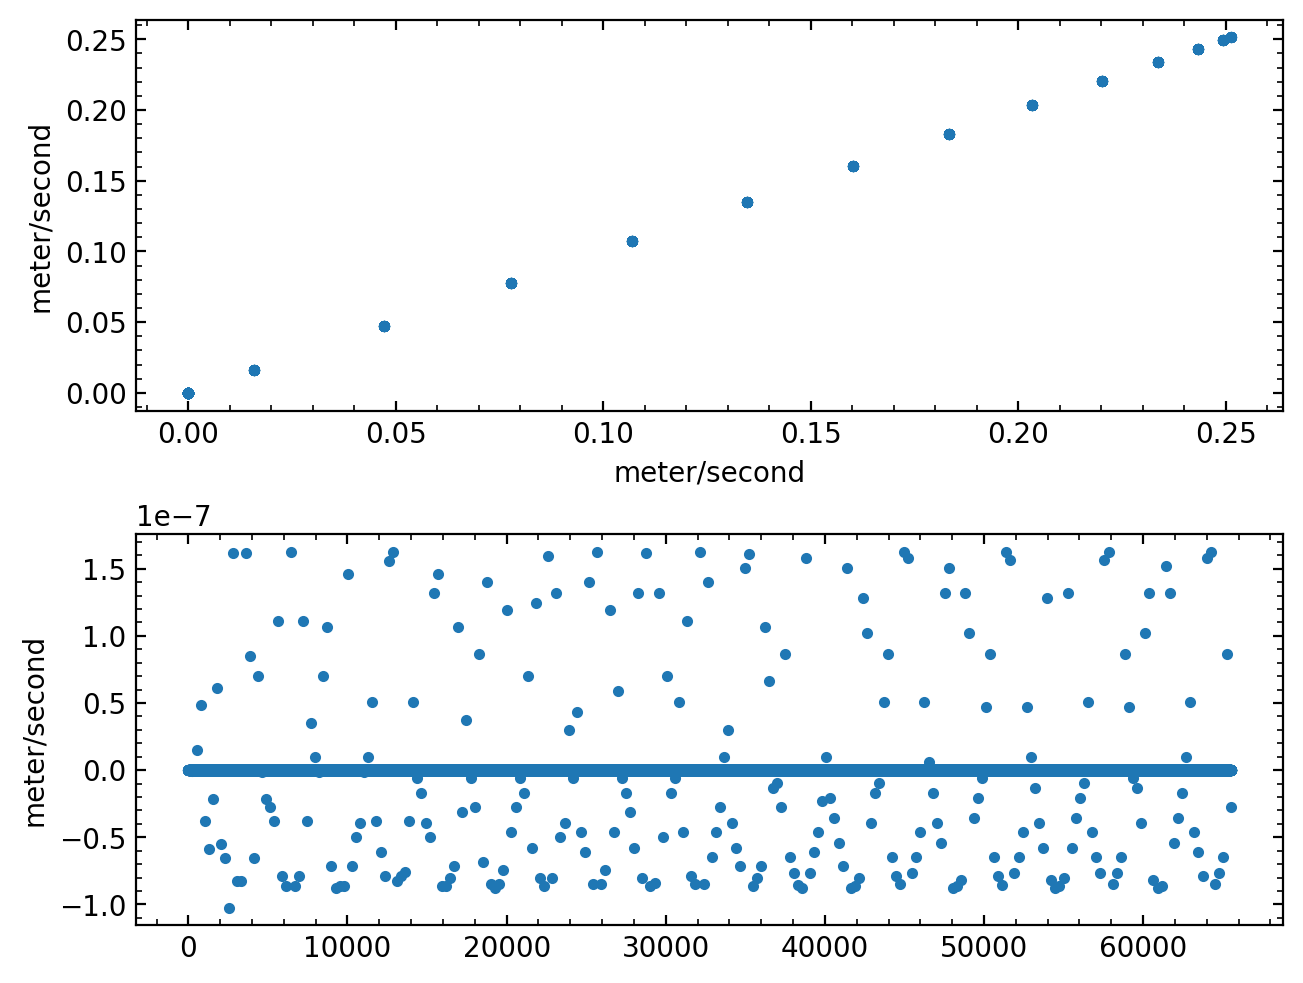

In [16]:
fig, ax = plt.subplots(2, layout="constrained")
ax[0].plot(r_ana.ravel(), r_num.ravel(), ".")
ax[1].plot(r_ana.ravel() - r_num.ravel(), ".")

nan


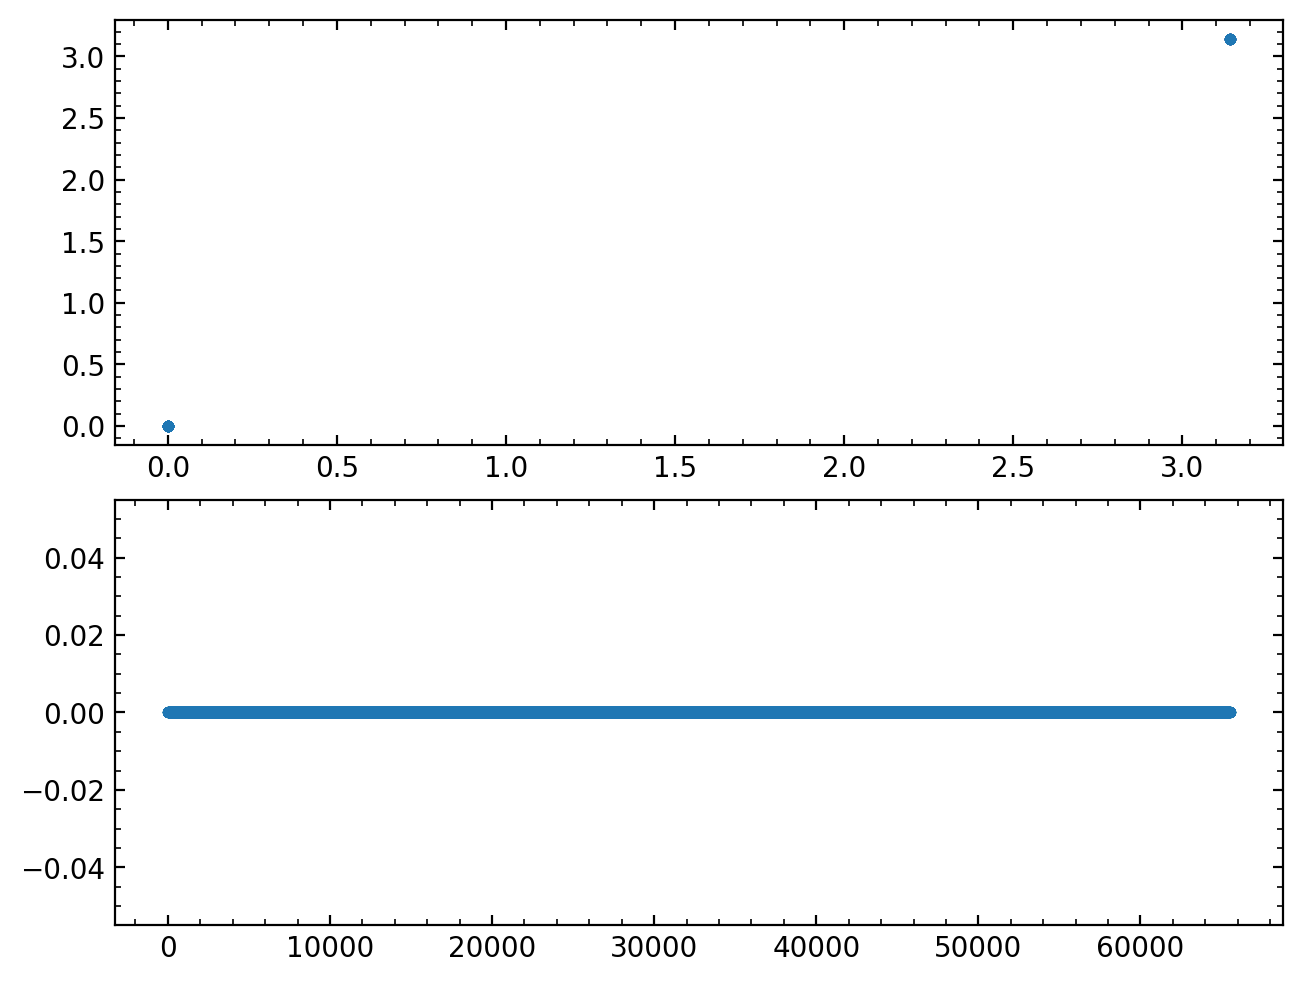

In [17]:
fig, ax = plt.subplots(2, layout="constrained")
ax[0].plot(theta_ana.ravel(), theta_num.ravel(), ".")
ax[1].plot(theta_ana.ravel() - theta_num.ravel(), ".")
print(np.max(np.abs(theta_ana.ravel() - theta_num.ravel())))